In [1]:
include("MyPyPlots.jl")
include("AuxFunctions.jl")
include("Hamiltonians.jl")
import .MyPyPlots
import .AuxFunctions
import .Hamiltonians

using DelimitedFiles
using LinearAlgebra

# Import sites and vectors

In [13]:
sites_path = "sites.txt"

dCC = 1.42028 #angstrom
uc = readdlm(sites_path, skipstart=1) #angstrom
a1 = [4.2608451843,         0.0000000000,         0.0000000000] #angstrom
a2 = [0.0000000000,         2.4599997997,         0.0000000000] #angstrom

MyPyPlots.structures2D(uc,vecs=[a1,a2],sitelabels=false,markersize=2)

# Find neighbors

In [14]:
neighbors_uc,neighbors_n1n2 = AuxFunctions.neighbors_honeycomb_2DBloch(uc,a1,a2,dNN=dCC,tol=1e-5*dCC);

MyPyPlots.structures2D(uc,neighbors=neighbors_uc,linecolors=["blue"],markersize=2,linewidth=0.2)

# Hamiltonian

In [15]:
t1 = -2.7 #eV

H2D(phi1,phi2) = Hamiltonians.TB_Bloch2D(phi1,phi2,neighbors_uc,neighbors_n1n2,hoppings=[t1])

H2D (generic function with 1 method)

In [16]:
ktest = [1.2,0.7,0] #Angstrom^(-1)

phi1 = dot(ktest,a1)
phi2 = dot(ktest,a2)

H2D(phi1,phi2)

4×4 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 8 stored entries:
          ⋅                  ⋅          -1.05298+2.48621im  -2.2933-2.66919im
          ⋅                  ⋅           -2.2933+2.66919im     -2.7+0.0im
 -1.05298-2.48621im  -2.2933-2.66919im           ⋅                  ⋅    
  -2.2933+2.66919im     -2.7+0.0im               ⋅                  ⋅    

In [17]:
ishermitian(H2D(phi1,phi2))

true

# Bands 3D

In [18]:
using Plots

function E2D(phi1, phi2, band)
    E,psi = eigen(Matrix(H2D(phi1,phi2)))
    return E[band]
end


E2D (generic function with 1 method)

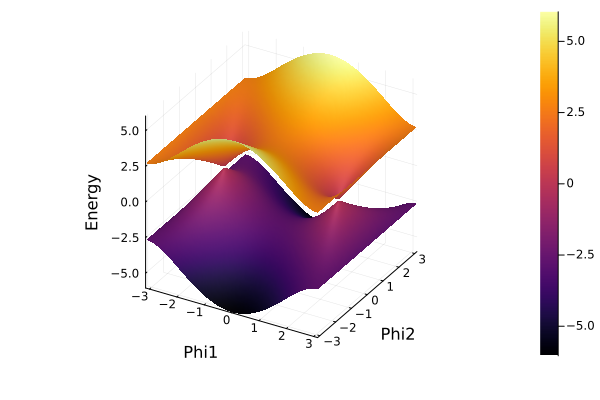

In [19]:
phi1_values = LinRange(-π, π, 100)
phi2_values = LinRange(-π, π, 100)

# Create a grid of phi1 and phi2 values
phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

# Calculate H2D values for each combination of phi1 and phi2
E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 2:3]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")

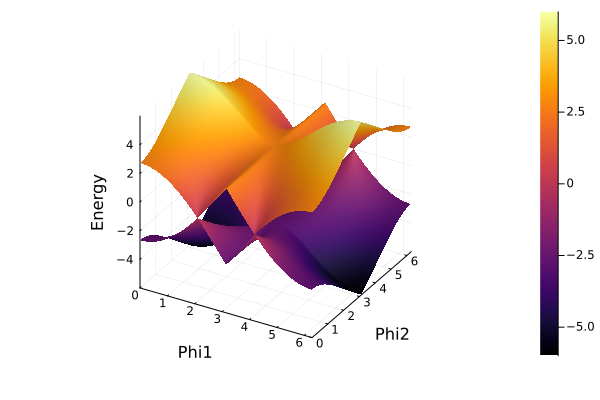

In [20]:
phi1_values = LinRange(0, 2π, 100)
phi2_values = LinRange(0, 2π, 100)

phi1_grid = repeat(phi1_values, 1, length(phi2_values))
phi2_grid = repeat(phi2_values', length(phi1_values), 1)

E2D_values = [E2D.(phi1_grid, phi2_grid, band) for band in 2:3]

plot(phi1_values, phi2_values, E2D_values[1], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")
plot!(phi1_values, phi2_values, E2D_values[2], st=:surface, xlabel="Phi1", ylabel="Phi2", zlabel="Energy")